In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.pipeline import Pipeline
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Specify the path to your CSV file in Google Drive
csv_path = '/content/gdrive/MyDrive/kaggle_parsed_dataset.csv'

# Load data from the CSV file
df = pd.read_csv(csv_path)

# Display the first few rows of the dataset
print(df.head())

# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and SVM classifier
svm_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(probability=True))  # Enable probability estimates for calculating log loss
])

# Training parameters
epochs = 5
best_val_accuracy = 0.0
patience = 3  # Number of epochs with no improvement after which training will be stopped

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')

    # Train the SVM model on the training set
    X_train = train_data['Text']
    y_train = train_data['oh_label']
    svm_model.fit(X_train, y_train)

    # Make predictions on the validation set
    X_val = val_data['Text']
    y_val = val_data['oh_label']
    y_val_pred = svm_model.predict(X_val)

    # Evaluate the model on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_conf_matrix = confusion_matrix(y_val, y_val_pred)
    val_classification_rep = classification_report(y_val, y_val_pred)

    # Calculate log loss and accuracy on the validation set
    val_probabilities = svm_model.predict_proba(X_val)
    val_log_loss = log_loss(y_val, val_probabilities)
    print(f'Validation Log Loss: {val_log_loss}')

    print('Validation Set Metrics:')
    print(f'Accuracy: {val_accuracy}')
    print('Confusion Matrix:')
    print(val_conf_matrix)
    print('Classification Report:')
    print(val_classification_rep)

    # Check for early stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'Early stopping: No improvement in validation accuracy for {patience} epochs.')
            break

# Make predictions on the test set
X_test = test_data['Text']
y_test = test_data['oh_label']
y_test_pred = svm_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

print('Test Set Metrics:')
print(f'Accuracy: {test_accuracy}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_classification_rep)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   index  oh_label             Date  \
0      0         1  20120618192155Z   
1      1         0  20120528192215Z   
2      2         0              NaN   
3      3         0              NaN   
4      4         0  20120619094753Z   

                                                Text  Unnamed: 4  Unnamed: 5  \
0                               "You fuck your dad."         NaN         NaN   
1  "i really don't understand your point.\xa0 It ...         NaN         NaN   
2  "A\\xc2\\xa0majority of Canadians can and has ...         NaN         NaN   
3  "listen if you dont wanna get married to a man...         NaN         NaN   
4  "C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...         NaN         NaN   

   Unnamed: 6  Unnamed: 7  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN

In [ ]:
#random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Specify the path to your CSV file in Google Drive
csv_path = '/content/gdrive/MyDrive/kaggle_parsed_dataset.csv'

# Load data from the CSV file
df = pd.read_csv(csv_path)

# Display the first few rows of the dataset
print(df.head())

# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and Random Forest classifier
rf_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Training parameters
epochs = 5

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')

    # Train the Random Forest model on the training set
    X_train = train_data['Text']
    y_train = train_data['oh_label']
    rf_model.fit(X_train, y_train)

    # Make predictions on the validation set
    X_val = val_data['Text']
    y_val = val_data['oh_label']
    y_val_pred = rf_model.predict(X_val)

    # Evaluate the model on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Validation Accuracy: {val_accuracy}')

# Make predictions on the test set
X_test = test_data['Text']
y_test = test_data['oh_label']
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='binary')

print('Test Set Metrics:')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   index  oh_label             Date  \
0      0         1  20120618192155Z   
1      1         0  20120528192215Z   
2      2         0              NaN   
3      3         0              NaN   
4      4         0  20120619094753Z   

                                                Text  Unnamed: 4  Unnamed: 5  \
0                               "You fuck your dad."         NaN         NaN   
1  "i really don't understand your point.\xa0 It ...         NaN         NaN   
2  "A\\xc2\\xa0majority of Canadians can and has ...         NaN         NaN   
3  "listen if you dont wanna get married to a man...         NaN         NaN   
4  "C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...         NaN         NaN   

   Unnamed: 6  Unnamed: 7  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN

In [ ]:
#knn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Specify the path to your CSV file in Google Drive
csv_path = '/content/gdrive/MyDrive/kaggle_parsed_dataset.csv'

# Load data from the CSV file
df = pd.read_csv(csv_path)



# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and KNN classifier
knn_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=93))
])

# Train the KNN model on the training set
X_train = train_data['Text']
y_train = train_data['oh_label']
knn_model.fit(X_train, y_train)

# Make predictions on the test set
X_test = test_data['Text']
y_test = test_data['oh_label']
y_test_pred = knn_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='binary')

print('Test Set Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Test Set Metrics:
Accuracy: 0.7744318181818182
Precision: 0.7936507936507936
Recall: 0.42955326460481097
F1 Score: 0.5574136008918618


In [ ]:
# Check class balance in the entire dataset
class_balance = df['oh_label'].value_counts()
print('Class Balance:')
print(class_balance)


Class Balance:
0    144324
1     15362
Name: oh_label, dtype: int64


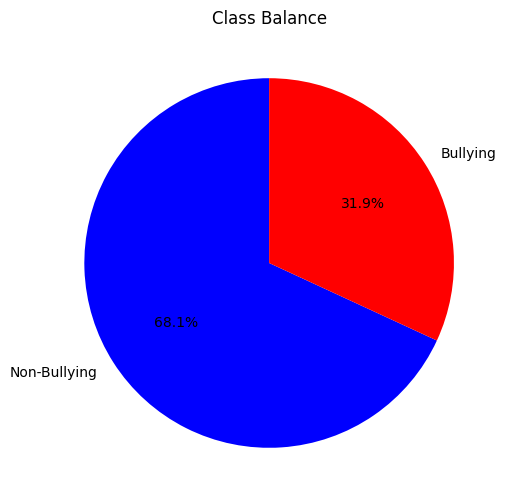

In [ ]:
import matplotlib.pyplot as plt

# Check class balance in the entire dataset
class_balance = df['oh_label'].value_counts()

# Plot class balance as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_balance, labels=['Non-Bullying', 'Bullying'], autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Class Balance')
plt.show()


In [ ]:
# Check class distribution in the training set
train_class_distribution = train_data['oh_label'].value_counts()
print('Class Distribution in Training Set:')
print(train_class_distribution)

# Check class distribution in the test set
test_class_distribution = test_data['oh_label'].value_counts()
print('Class Distribution in Test Set:')
print(test_class_distribution)


Class Distribution in Training Set:
0    2438
1     333
Name: oh_label, dtype: int64
Class Distribution in Test Set:
0    609
1     84
Name: oh_label, dtype: int64


In [ ]:
#nb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
from sklearn.pipeline import Pipeline
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Specify the path to your CSV file in Google Drive
csv_path = '/content/gdrive/MyDrive/kaggle_parsed_dataset.csv'

# Load data from the CSV file
df = pd.read_csv(csv_path)

# Display the first few rows of the dataset
print(df.head())

# Split the data into training, validation, and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and Multinomial Naive Bayes classifier
nb_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Training parameters
epochs = 5
best_val_accuracy = 0.0
patience = 3  # Number of epochs with no improvement after which training will be stopped

for epoch in range(epochs):
    print(f'Epoch {epoch + 1}/{epochs}')

    # Train the Naive Bayes model on the training set
    X_train = train_data['Text']
    y_train = train_data['oh_label']
    nb_model.fit(X_train, y_train)

    # Make predictions on the validation set
    X_val = val_data['Text']
    y_val = val_data['oh_label']
    y_val_pred = nb_model.predict(X_val)

    # Evaluate the model on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_conf_matrix = confusion_matrix(y_val, y_val_pred)
    val_classification_rep = classification_report(y_val, y_val_pred)

    # Calculate log loss and accuracy on the validation set (Note: Naive Bayes doesn't have predict_proba, so log_loss is not calculated)
    val_log_loss = None
    print(f'Validation Log Loss: {val_log_loss}')

    print('Validation Set Metrics:')
    print(f'Accuracy: {val_accuracy}')
    print('Confusion Matrix:')
    print(val_conf_matrix)
    print('Classification Report:')
    print(val_classification_rep)

    # Check for early stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'Early stopping: No improvement in validation accuracy for {patience} epochs.')
            break

# Make predictions on the test set
X_test = test_data['Text']
y_test = test_data['oh_label']
y_test_pred = nb_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

print('Test Set Metrics:')
print(f'Accuracy: {test_accuracy}')
print('Confusion Matrix:')
print(test_conf_matrix)
print('Classification Report:')
print(test_classification_rep)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
   index  oh_label             Date  \
0      0         1  20120618192155Z   
1      1         0  20120528192215Z   
2      2         0              NaN   
3      3         0              NaN   
4      4         0  20120619094753Z   

                                                Text  Unnamed: 4  Unnamed: 5  \
0                               "You fuck your dad."         NaN         NaN   
1  "i really don't understand your point.\xa0 It ...         NaN         NaN   
2  "A\\xc2\\xa0majority of Canadians can and has ...         NaN         NaN   
3  "listen if you dont wanna get married to a man...         NaN         NaN   
4  "C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...         NaN         NaN   

   Unnamed: 6  Unnamed: 7  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


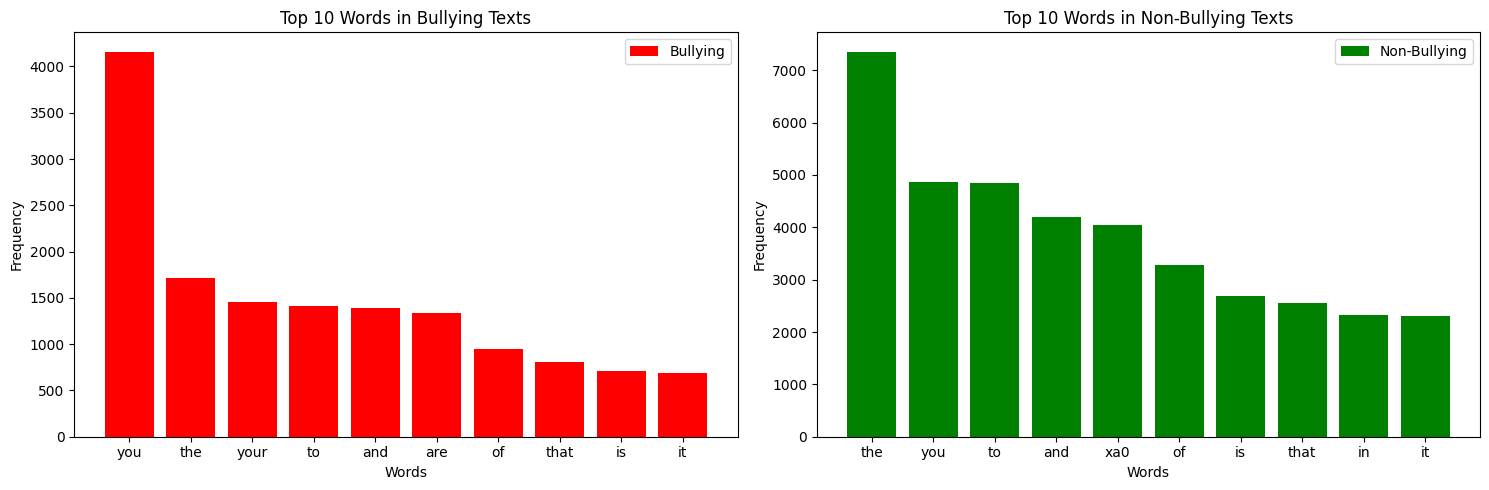

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.feature_extraction.text import CountVectorizer

# Mount Google Drive
drive.mount('/content/drive')

# Replace 'your_dataset.csv' with the actual path to your CSV file
file_path = '/content/drive/My Drive/kaggle_parsed_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Combine all texts
all_text = df['Text']

# Convert text to bag-of-words representation
vectorizer = CountVectorizer()
all_bow = vectorizer.fit_transform(all_text)

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Separate texts based on labels
bullying_text = df[df['oh_label'] == 1]['Text']
non_bullying_text = df[df['oh_label'] == 0]['Text']

# Convert text to bag-of-words representation using the same feature set
bullying_bow = vectorizer.transform(bullying_text)
non_bullying_bow = vectorizer.transform(non_bullying_text)

# Calculate word frequencies for each class
bullying_word_frequencies = bullying_bow.sum(axis=0).A1
non_bullying_word_frequencies = non_bullying_bow.sum(axis=0).A1

# Create DataFrames for visualization
bullying_df = pd.DataFrame({'Word': feature_names, 'Frequency': bullying_word_frequencies})
non_bullying_df = pd.DataFrame({'Word': feature_names, 'Frequency': non_bullying_word_frequencies})

# Sort DataFrames by frequency
bullying_df = bullying_df.sort_values(by='Frequency', ascending=False)
non_bullying_df = non_bullying_df.sort_values(by='Frequency', ascending=False)

# Plot the most common words for both classes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Bullying class
axes[0].bar(bullying_df['Word'][:10], bullying_df['Frequency'][:10], color='red', label='Bullying')
axes[0].set_title('Top 10 Words in Bullying Texts')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')

# Non-bullying class
axes[1].bar(non_bullying_df['Word'][:10], non_bullying_df['Frequency'][:10], color='green', label='Non-Bullying')
axes[1].set_title('Top 10 Words in Non-Bullying Texts')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')

# Add legends
axes[0].legend()
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


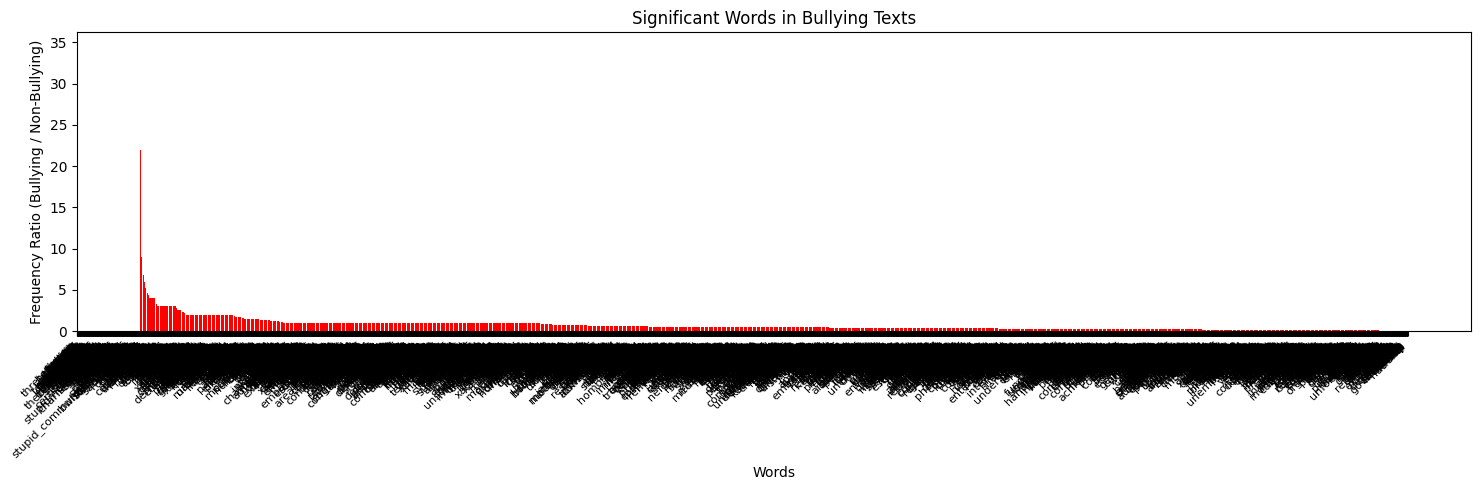

In [ ]:
plt.figure(figsize=(15, 5))  # Increase the figure width
plt.bar(filtered_words['Word'], filtered_words['FrequencyRatio'], color='red')
plt.title('Significant Words in Bullying Texts')
plt.xlabel('Words')
plt.ylabel('Frequency Ratio (Bullying / Non-Bullying)')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Adjust the rotation and font size
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


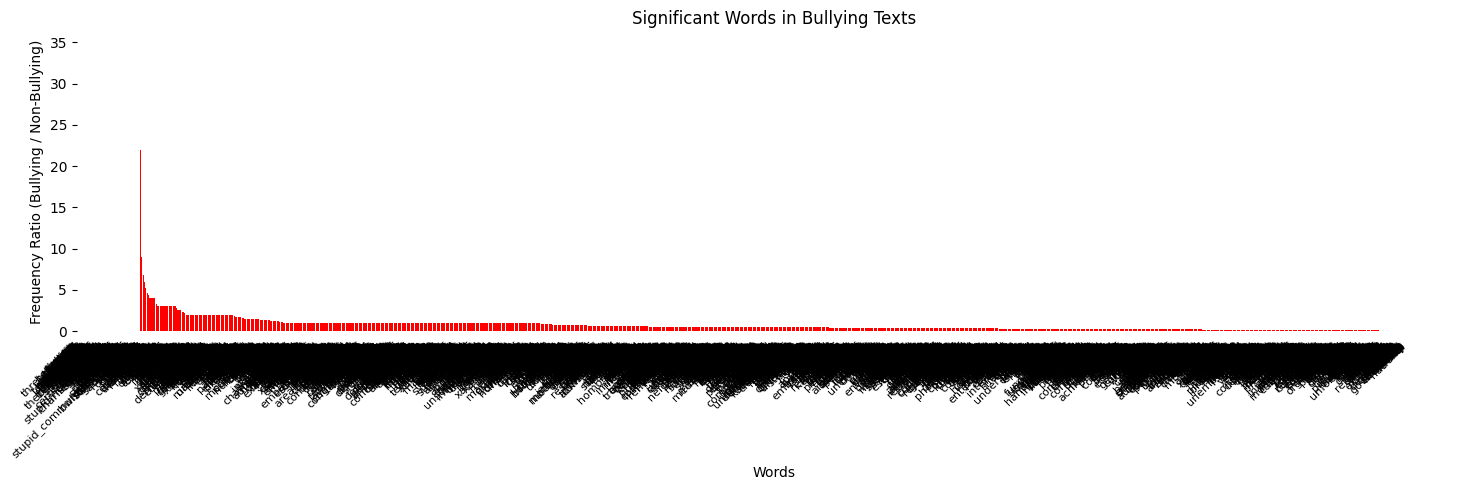

In [ ]:
plt.figure(figsize=(15, 5))
bars = plt.bar(filtered_words['Word'], filtered_words['FrequencyRatio'], color='red')
plt.title('Significant Words in Bullying Texts')
plt.xlabel('Words')
plt.ylabel('Frequency Ratio (Bullying / Non-Bullying)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()

# Customize tick lines
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

# Remove spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()


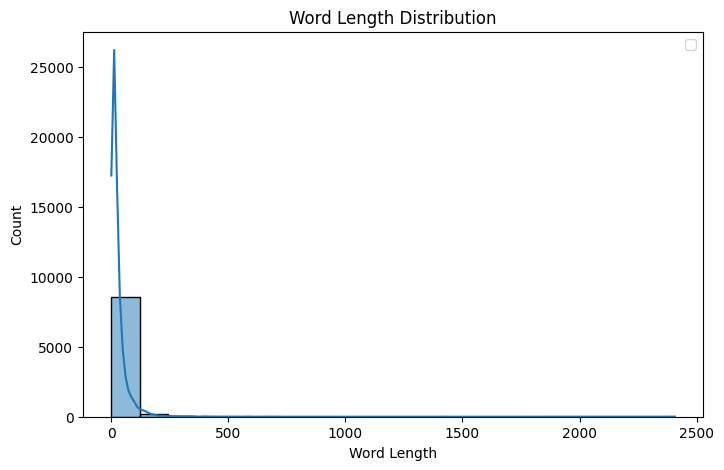

In [ ]:
# Calculate word lengths
df['Word_Length'] = df['Text'].apply(lambda x: len(str(x).split()))

# Plot word length distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Word_Length', bins=20, kde=True)
plt.title('Word Length Distribution')
plt.xlabel('Word Length')
plt.ylabel('Count')
plt.legend()
plt.show()


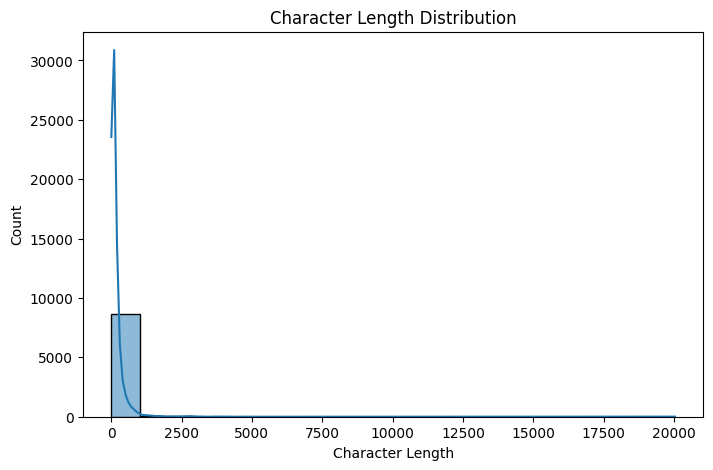

In [ ]:
# Calculate character lengths
df['Char_Length'] = df['Text'].apply(lambda x: len(str(x)))

# Plot character length distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Char_Length', bins=20, kde=True)
plt.title('Character Length Distribution')
plt.xlabel('Character Length')
plt.ylabel('Count')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


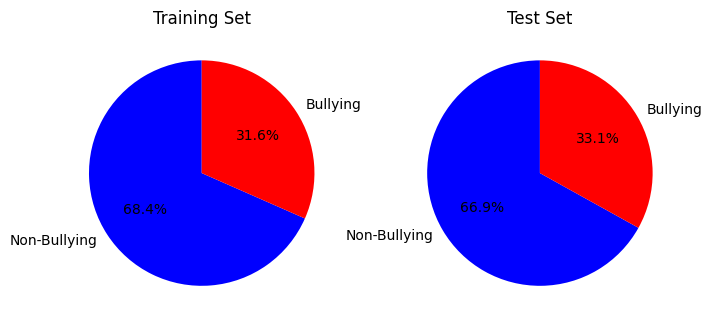

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split

# Mount Google Drive
drive.mount('/content/drive')

# Load your dataset from Google Drive (replace 'your_dataset.csv' with your actual file path)
file_path = '/content/drive/My Drive/kaggle_parsed_dataset.csv'
df = pd.read_csv(file_path)

# Split the dataset into training and test sets (80-20 ratio)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Check class distribution in the training set
train_class_distribution = train_data['oh_label'].value_counts()

# Check class distribution in the test set
test_class_distribution = test_data['oh_label'].value_counts()

# Plot class distribution in the training set as a pie chart
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.pie(train_class_distribution, labels=['Non-Bullying', 'Bullying'], autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Training Set')

# Plot class distribution in the test set as a pie chart
plt.subplot(1, 2, 2)
plt.pie(test_class_distribution, labels=['Non-Bullying', 'Bullying'], autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
plt.title('Test Set')

plt.show()


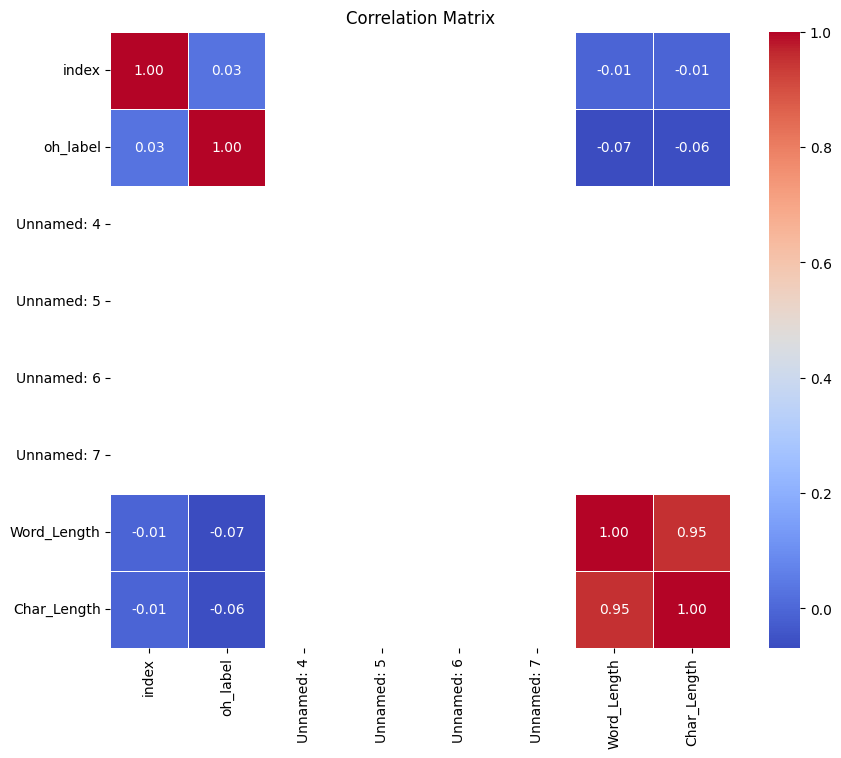

In [ ]:
# Drop non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


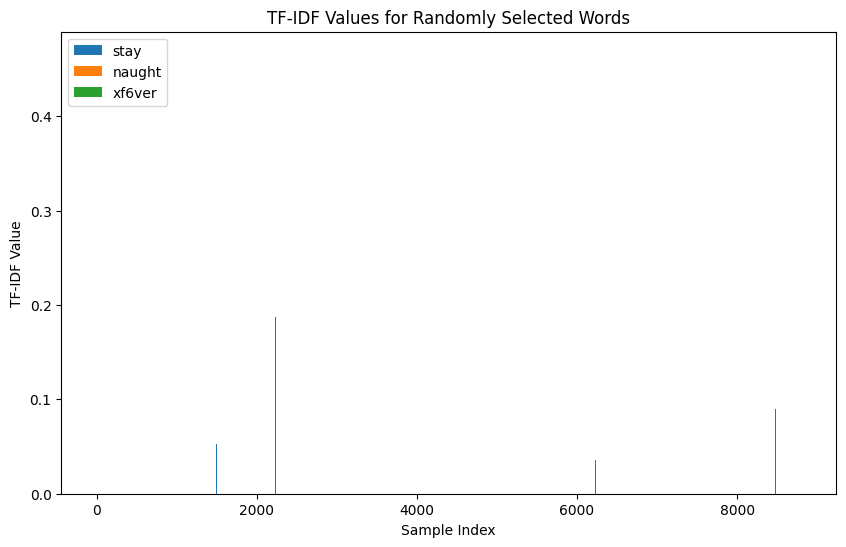

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from google.colab import drive
import random

# Mount Google Drive
drive.mount('/content/drive')

# Load your dataset from Google Drive (replace 'your_dataset.csv' with your actual file path)
file_path = '/content/drive/My Drive/kaggle_parsed_dataset.csv'
df = pd.read_csv(file_path)

# Assuming 'Text' is the column containing your text data
corpus = df['Text'].tolist()

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Get feature names (words) from the vectorizer and convert to a list
feature_names = list(tfidf_vectorizer.get_feature_names_out())

# Convert TF-IDF matrix to a DataFrame for visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Select a random subset of words for visualization
selected_words = random.sample(feature_names, 3)

# Plot TF-IDF values for selected words in a bar chart
plt.figure(figsize=(10, 6))
for word in selected_words:
    plt.bar(df.index, tfidf_df[word], label=word)

plt.xlabel('Sample Index')
plt.ylabel('TF-IDF Value')
plt.title('TF-IDF Values for Randomly Selected Words')
plt.legend()
plt.show()
